In [1]:
# Analize a 32-day test that started on 07/26/2023

import pandas as pd
import matplotlib.pyplot as plt

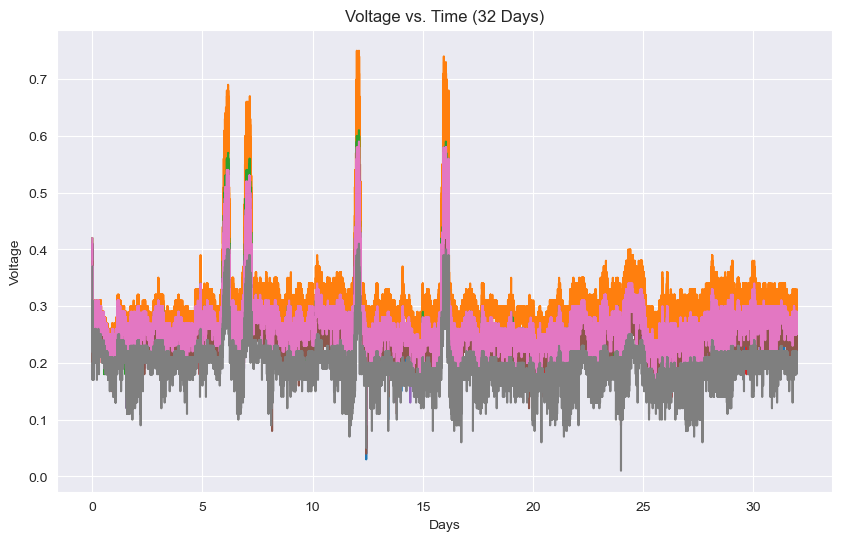

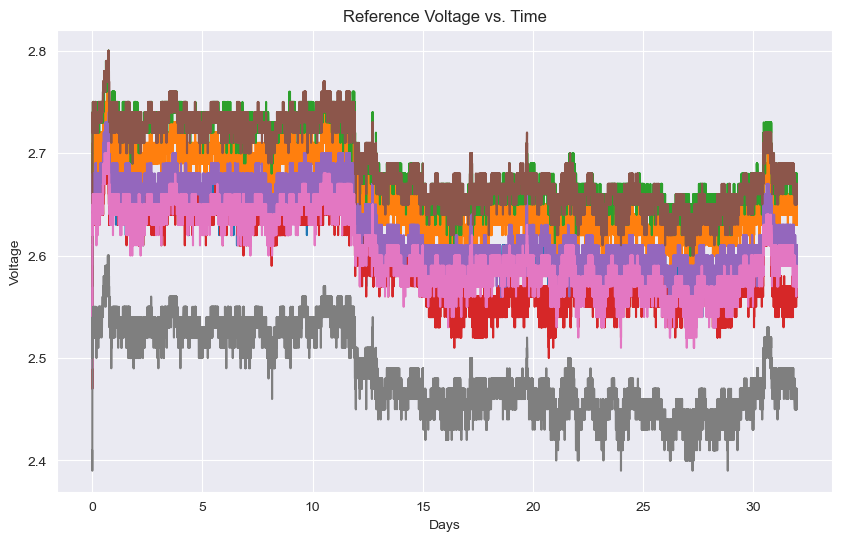

In [2]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('../Raw Data/CorrectedLog.csv')

# Calculate the time difference in days since the first row (assuming each row is 5 seconds)
df['Days'] = (df.index * 5) / (24 * 60 * 60)

# Select the columns for the y-axis
y_columns = ['Vout_0', 'Vout_1', 'Vout_2', 'Vout_3', 'Vout_4', 'Vout_5', 'Vout_6', 'Vout_7']

# Plot the data
plt.figure(figsize=(10, 6))
for column in y_columns:
    plt.plot(df['Days'], df[column], label=column)

plt.xlabel('Days')
plt.ylabel('Voltage')
plt.title('Voltage vs. Time (32 Days)')
#plt.legend()
plt.grid(True)
plt.show()

y_columns = ['Vref_0', 'Vref_1', 'Vref_2', 'Vref_3', 'Vref_4', 'Vref_5', 'Vref_6', 'Vref_7']

# Plot the data
plt.figure(figsize=(10, 6))
for column in y_columns:
    plt.plot(df['Days'], df[column], label=column)

plt.xlabel('Days')
plt.ylabel('Voltage')
plt.title('Reference Voltage vs. Time')
# plt.legend()
plt.grid(True)
plt.show()

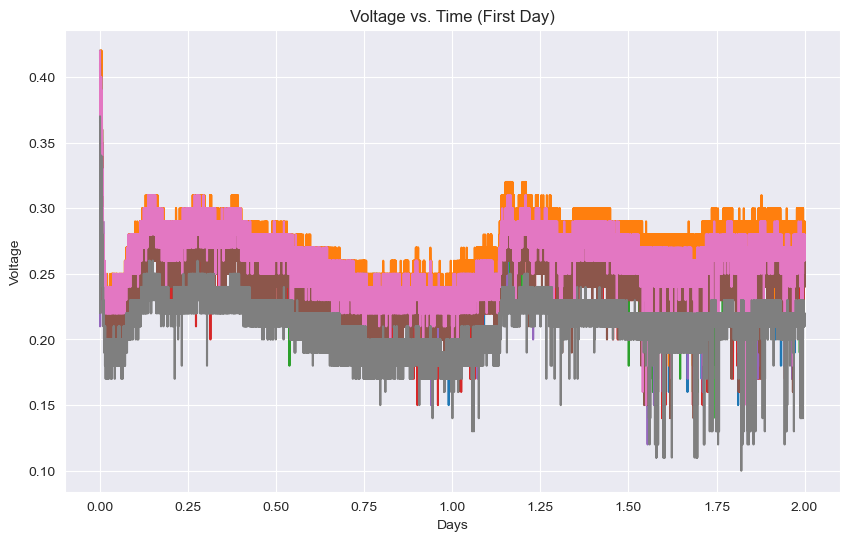

In [3]:
# Read the CSV file into a pandas DataFrame

# Calculate the time difference in days since the first row (assuming each row is 5 seconds)
df['Days'] = (df.index * 5) / (24 * 60 * 60)

# Select the columns for the y-axis
y_columns = ['Vout_0', 'Vout_1', 'Vout_2', 'Vout_3', 'Vout_4', 'Vout_5', 'Vout_6', 'Vout_7']

# Plot the data for the first day
plt.figure(figsize=(10, 6))
for column in y_columns:
    plt.plot(df['Days'][:17280*2], df[column][:17280*2], label=column)

plt.xlabel('Days')
plt.ylabel('Voltage')
plt.title('Voltage vs. Time (First Day)')
#plt.legend()
plt.grid(True)
plt.show()

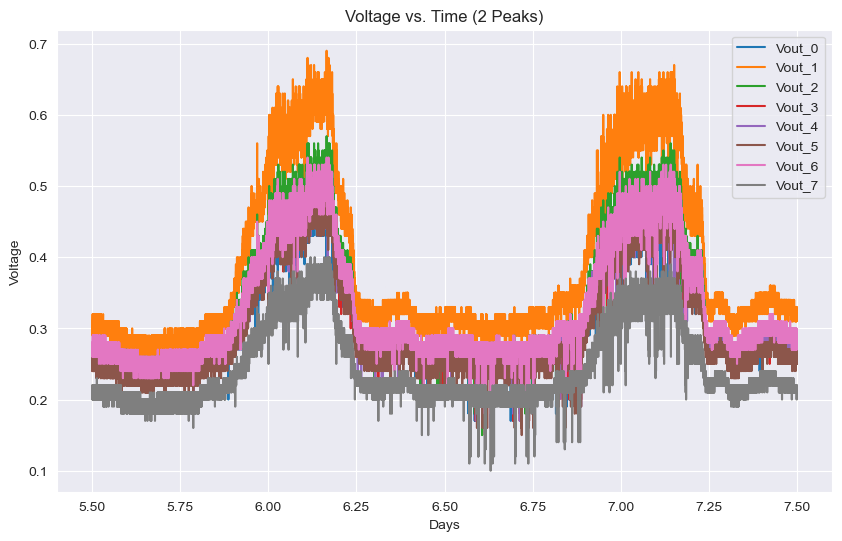

In [4]:

# Calculate the time difference in days since the first row (assuming each row is 5 seconds)
df['Days'] = (df.index * 5) / (24 * 60 * 60)

# Select the columns for the y-axis
y_columns = ['Vout_0', 'Vout_1', 'Vout_2', 'Vout_3', 'Vout_4', 'Vout_5', 'Vout_6', 'Vout_7']

# Plot the data for the first day
plt.figure(figsize=(10, 6))
for column in y_columns:
    plt.plot(df['Days'][95040:129600], df[column][95040:129600], label=column)

plt.xlabel('Days')
plt.ylabel('Voltage')
plt.title('Voltage vs. Time (2 Peaks)')
plt.legend()
plt.grid(True)
plt.show()

In [5]:

# Select the columns for which you want statistics
vout_columns = ['Vout_0', 'Vout_1', 'Vout_2', 'Vout_3', 'Vout_4', 'Vout_5', 'Vout_6', 'Vout_7']

# Get statistics for the selected columns
statistics = df[vout_columns].describe()

# Print the statistics and modes
print("Statistics for Vout Columns:")
print(statistics)


Statistics for Vout Columns:
              Vout_0         Vout_1         Vout_2         Vout_3  \
count  552660.000000  552660.000000  552660.000000  552660.000000   
mean        0.258308       0.313935       0.270256       0.255371   
std         0.035254       0.054118       0.042481       0.039995   
min         0.030000       0.100000       0.080000       0.050000   
25%         0.240000       0.290000       0.250000       0.230000   
50%         0.250000       0.310000       0.260000       0.250000   
75%         0.270000       0.330000       0.280000       0.270000   
max         0.520000       0.750000       0.610000       0.570000   

              Vout_4        Vout_5         Vout_6         Vout_7  
count  552660.000000  552660.00000  552660.000000  552660.000000  
mean        0.255085       0.24630       0.273832       0.204454  
std         0.036969       0.03789       0.040234       0.029219  
min         0.050000       0.04000       0.090000       0.010000  
25%         0.

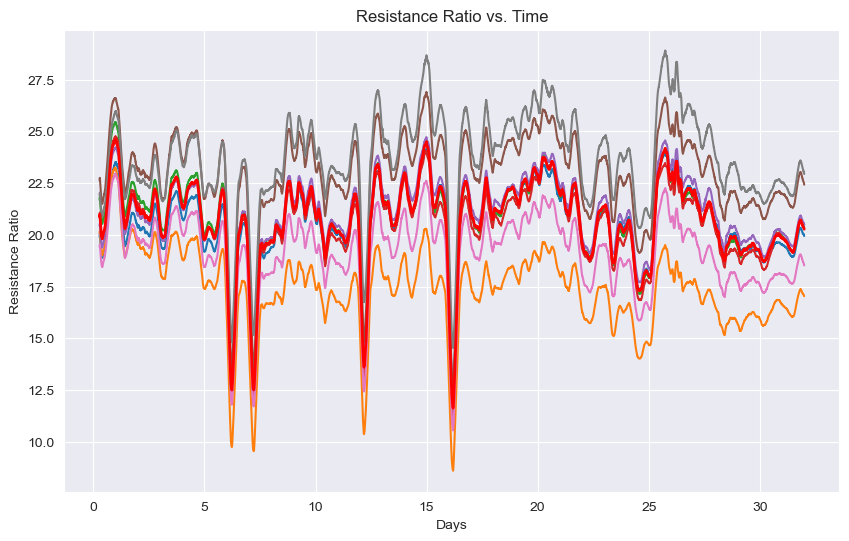

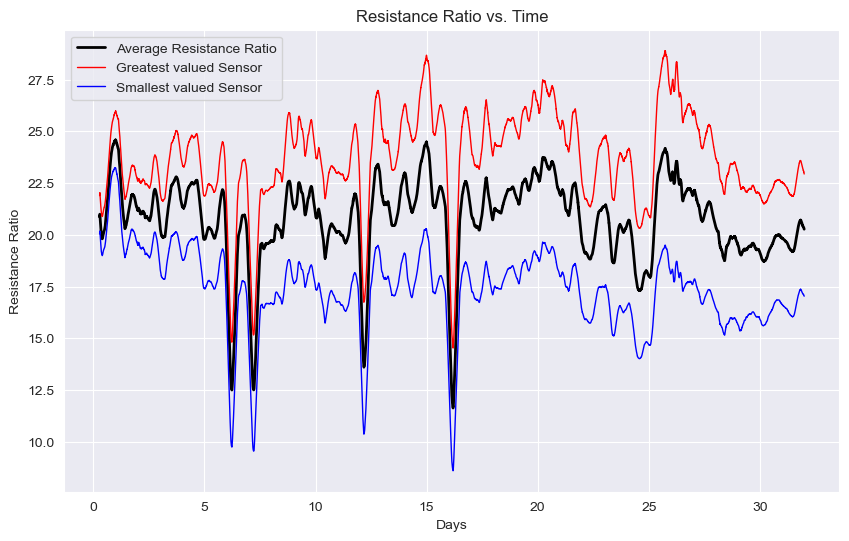

In [20]:
# Placeholder function, replace this with your actual function
def placeholder_function(vout, vref):
    return (vref*(5-vout))/(vout*(5-vref))  # Example placeholder function

# Calculate the time difference in days since the first row (assuming each row is 5 seconds)
df['Days'] = (df.index * 5) / (24 * 60 * 60)

# Iterate through the Vout and Vref columns to create rr columns
for i in range(8):
    vout_col = f'Vout_{i}'
    vref_col = f'Vref_{i}'
    rr_col = f'rr_{i}'

    df[rr_col] = df.apply(lambda row: placeholder_function(row[vout_col], row[vref_col]), axis=1)

    # Apply rolling average with window size of 60
    df[f'{rr_col}_rolling_avg'] = df[rr_col].rolling(window=5000).mean()

rr_rolling_avg_columns = [f'rr_{i}_rolling_avg' for i in range(8)]
df['rr_rolling_avg_mean'] = df[rr_rolling_avg_columns].mean(axis=1)

plt.figure(figsize=(10, 6))
for column in rr_rolling_avg_columns:
    plt.plot(df['Days'], df[column], label=column)

plt.plot(df['Days'], df['rr_rolling_avg_mean'], 'r', linewidth=2, label='Average Resistance Ratio')

plt.xlabel('Days')
plt.ylabel('Resistance Ratio')
plt.title('Resistance Ratio vs. Time')
#plt.legend()
plt.grid(True)
plt.show()

column_means = df[rr_rolling_avg_columns].mean()
# Find the columns with the greatest and smallest mean values
max_col = column_means.idxmax()
min_col = column_means.idxmin()

# Plot setup
plt.figure(figsize=(10, 6))

# Plot the mean line
plt.plot(df['Days'], df['rr_rolling_avg_mean'], 'k', linewidth=2, label='Average Resistance Ratio')

# Plot the column with the greatest values
plt.plot(df['Days'], df[max_col], 'r', linewidth=1, label="Greatest valued Sensor")

# Plot the column with the smallest values
plt.plot(df['Days'], df[min_col], 'b', linewidth=1, label="Smallest valued Sensor")

# Remaining plot attributes
plt.xlabel('Days')
plt.ylabel('Resistance Ratio')
plt.title('Resistance Ratio vs. Time')
plt.grid(True)
plt.legend()
plt.show()

In [7]:
import pandas as pd
import scipy.optimize as sc
import numpy as np
import matplotlib.pyplot as plt

file2 = pd.read_csv("../Output/LowPPMMatrix.csv")
# Extract the columns from the data

file2=file2[file2['Target PPM']!=150]

xDataResistance = file2.loc[:, 'Resistance']
xDataRatio = file2.loc[:, 'Ratio']
xDataRH = file2.loc[:, 'RelativeHumidity']
xDataTemp = file2.loc[:, 'Temperature']
yDataTargetPPM = file2.loc[:, 'Target PPM']

def funkEQ(X, a, b):
    R, H, T = X
    with np.errstate(over='ignore'):
        stuff=0.97**((((-1*R)/(H**(-0.66)))*a)+(-1*H)+(1.21*T)+(((-1.22*T)/(H**0.23))*1.25)+-178.26)+b
    return stuff
p0 = 1,1

# Perform curve fitting using the funct function, xDataResistance, and yDataTargetPPM data
# Set the maximum number of function evaluations to 1000000

popt, pcov = sc.curve_fit(funkEQ, (xDataResistance, xDataRH, xDataTemp), yDataTargetPPM, p0, maxfev=1000000)



In [8]:
# Your constants
T = 23
H = 20

# New DataFrame to store calculated values
new_df = pd.DataFrame()

# Loop through each of the rr_X_rolling_avg columns to apply funkEQ
for rr_col in rr_rolling_avg_columns:
    new_col_name = f'funkEQ_result_{rr_col}'
    new_df[new_col_name] = df[rr_col].apply(lambda R: funkEQ((R, H, T),*popt))

# If you want to keep the 'Days' column in the new DataFrame
new_df['Days'] = df['Days']

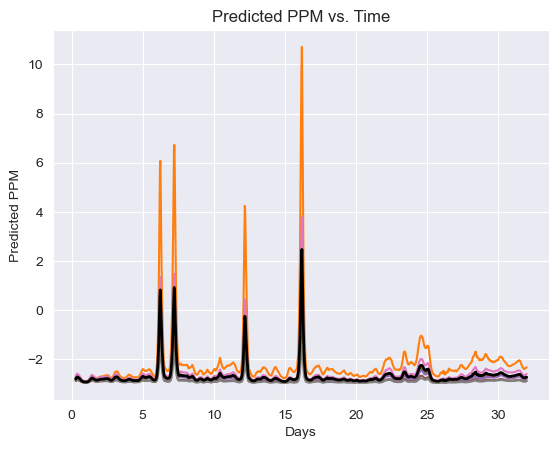

The overall average of the first 4 days for all columns is -2.827317339844808


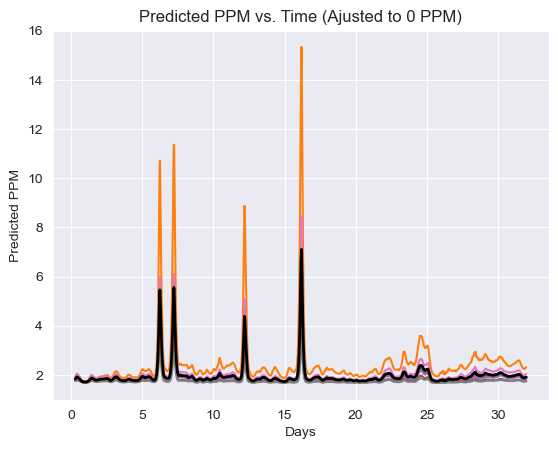

In [24]:
# List of columns to plot (all columns that start with 'funkEQ_result_')
funkEQ_result_columns = [col for col in new_df.columns if 'funkEQ_result_' in col]

new_df['funkEQ_result_mean'] = new_df[funkEQ_result_columns].mean(axis=1)


# Loop through each column to plot it
for column in funkEQ_result_columns:
    plt.plot(new_df['Days'], (new_df[column]), label=column)

# Plot the red average line
plt.plot(new_df['Days'], (new_df['funkEQ_result_mean']), 'k', linewidth=2, label='Average Calculated Value')


# Plotting attributes
plt.xlabel('Days')
plt.ylabel('Predicted PPM')
plt.title('Predicted PPM vs. Time')
plt.grid(True)
plt.show()
# Slice the DataFrame to only include the first day
first_4_days_df = new_df[new_df['Days'] < 1]

# Calculate the mean of all columns for each of the first days
daily_averages = first_4_days_df[funkEQ_result_columns].mean(axis=1)

# Calculate the overall average for the first day
overall_average_first_4_days = daily_averages.mean()
print(f"The overall average of the first 4 days for all columns is {overall_average_first_4_days}")

# This will need to be recorded while sensor are being installed or some
Site_Measured_PPM = 1.8

# Loop through each column to plot it
for column in funkEQ_result_columns:
    plt.plot(new_df['Days'], (new_df[column]+Site_Measured_PPM-overall_average_first_4_days), label=column)

# Plot the red average line
plt.plot(new_df['Days'], (new_df['funkEQ_result_mean']+Site_Measured_PPM-overall_average_first_4_days), 'k', linewidth=2, label='Average Calculated Value')

# Plotting attributes
plt.xlabel('Days')
plt.ylabel('Predicted PPM')
plt.title('Predicted PPM vs. Time (Ajusted to 0 PPM)')
plt.grid(True)
plt.show()